#UNSUPERVISED LEARNING




##Exam project 1


*   Davide Zangari 844760
*   Martin Joel Mouk Elele 896659


**The diabetes dataset**

*no plagiarized content or code copied from other sources, including ChatGPT or similar, has been used in the following notebook.*

## **TASK 1**

> Develop a software code for preprocessing the dataset, i.e., for computing the distance between different
data objects. Notice that you have to cope with binary and discrete attributes!!!

In [18]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# import some useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from PIL import Image
import os

In [20]:
# uploading the dataset .xlsx from google drive
ds = pd.read_excel('/content/drive/MyDrive/Master degree AI/Unsupervised Learning/UNSUP_PROJ/Diabetes - UL project 1.xlsx')

In [ ]:
# dataset exploration, visualizing the first 5 lines
ds.head()

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0    4    1         0          1   26       0                     0   
1    8    0         0          1   29       1                     0   
2    3    0         0          1   32       0                     0   
3   12    0         1          1   24       1                     1   
4   10    1         0          1   58       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             1       1        1                  0        2         0   
2             1       1        1                  0        3         0   
3             1       1        1                  0        3         0   
4             0       1        1                  0        3         3   

   PhysHlth  DiffWalk  Diabetes  Hypertension  Stroke  
0        30         0         0             1       0  
1         0         0         0             0       0  
2         0         0         0             0       0  
3         4         0         0             1       0  
4         3         0         0             1       0

In [ ]:
# checking the shape of the dataset
ds.shape

(40108, 18)

In [ ]:
# checking the datatypes
ds.dtypes

Age                     int64
Sex                     int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Diabetes                int64
Hypertension            int64
Stroke                  int64
dtype: object

there are no missing values!

In [ ]:
# checking NaN values
ds.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [ ]:
# descriptive statistics
ds.describe()

Age           Sex      HighChol     CholCheck           BMI  \
count  40108.000000  40108.000000  40108.000000  40108.000000  40108.000000   
mean       8.578089      0.482946      0.517503      0.971327     29.954523   
std        2.851519      0.499715      0.499700      0.166887      7.435545   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  40108.000000          40108.000000  40108.000000  40108.000000   
mean       0.494490              0.144086      0.677346      0.589384   
std        0.499976              0.351181      0.467497      0.491952   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      1.000000      1.000000   
75%        1.000000              0.000000      1.000000      1.000000   
max        1.000000              1.000000      1.000000      1.000000   

            Veggies  HvyAlcoholConsump       GenHlth      MentHlth  \
count  40108.000000       40108.000000  40108.000000  40108.000000   
mean       0.778473           0.041737      2.858956      3.605740   
std        0.415279           0.199991      1.105152      7.971567   
min        0.000000           0.000000      1.000000      0.000000   
25%        1.000000           0.000000      2.000000      0.000000   
50%        1.000000           0.000000      3.000000      0.000000   
75%        1.000000           0.000000      4.000000      2.000000   
max        1.000000           1.000000      5.000000     30.000000   

           PhysHlth      DiffWalk      Diabetes  Hypertension        Stroke  
count  40108.000000  40108.000000  40108.000000  40108.000000  40108.000000  
mean       5.807121      0.258178      0.510846      0.547322      0.063179  
std       10.040710      0.437638      0.499889      0.497762      0.243288  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      1.000000      1.000000      0.000000  
75%        6.000000      1.000000      1.000000      1.000000      0.000000  
max       30.000000      1.000000      1.000000      1.000000      1.000000

Data visualization

No. of diabate negatives (0):  20489
No. of diabete positives (1):  19619
No. of hypertension negatives (0):  21952
No. of hypertension positives (1):  18156
No. of Stroke negatives (0):  37574
No. of Stroke positives (1):  2534


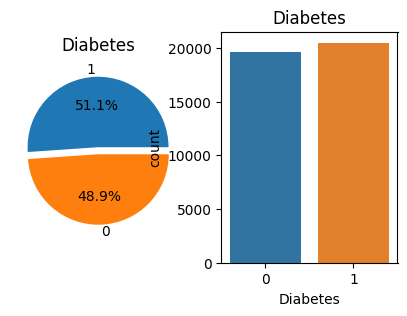

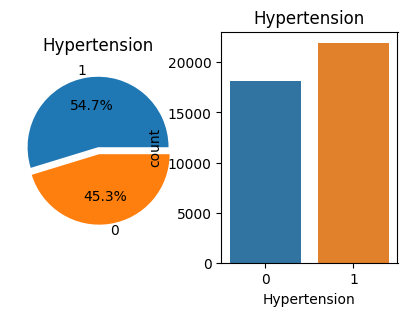

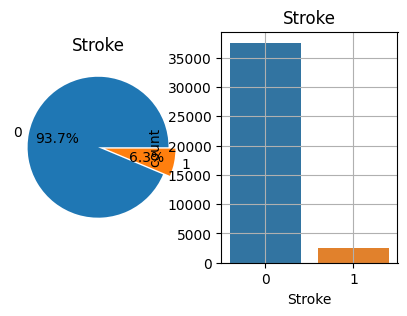

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (5, 3))
#plt.style.use('default')
ds['Diabetes'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0]) # plotting the pie chart
ax[0].set_title('Diabetes') # setting the title
ax[0].set_ylabel('') # setting the y label

sns.countplot(x = ds['Diabetes'], ax = ax[1]) # plotting the count plot
ax[1].set_title('Diabetes') # setting the title

N, P = ds['Diabetes'].value_counts() # no. of positives and no. of negatives
print('No. of diabate negatives (0): ', N) # no. of negatives
print('No. of diabete positives (1): ', P) # no. of positives

f1, ax1 = plt.subplots(1, 2, figsize = (5, 3))
ds['Hypertension'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax1[0]) # plotting the pie chart
ax1[0].set_title('Hypertension') # setting the title
ax1[0].set_ylabel('') # setting the y label

sns.countplot(x = ds['Hypertension'], ax = ax1[1]) # plotting the count plot
ax1[1].set_title('Hypertension') # setting the title

N1, P1 = ds['Hypertension'].value_counts() # no. of positives and no. of negatives
print('No. of hypertension negatives (0): ', N1) # no. of negatives
print('No. of hypertension positives (1): ', P1) # no. of positives

f2, ax2 = plt.subplots(1, 2, figsize = (5, 3))
ds['Stroke'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax2[0]) # plotting the pie chart
ax2[0].set_title('Stroke') # setting the title
ax2[0].set_ylabel('') # setting the y label

sns.countplot(x = ds['Stroke'], ax = ax2[1]) # plotting the count plot
ax2[1].set_title('Stroke') # setting the title

N2, P2 = ds['Stroke'].value_counts() # no. of positives and no. of negatives
print('No. of Stroke negatives (0): ', N2) # no. of negatives
print('No. of Stroke positives (1): ', P2) # no. of positives
plt.grid() # adding grid
plt.show() # showing the plot

Correlation matrix

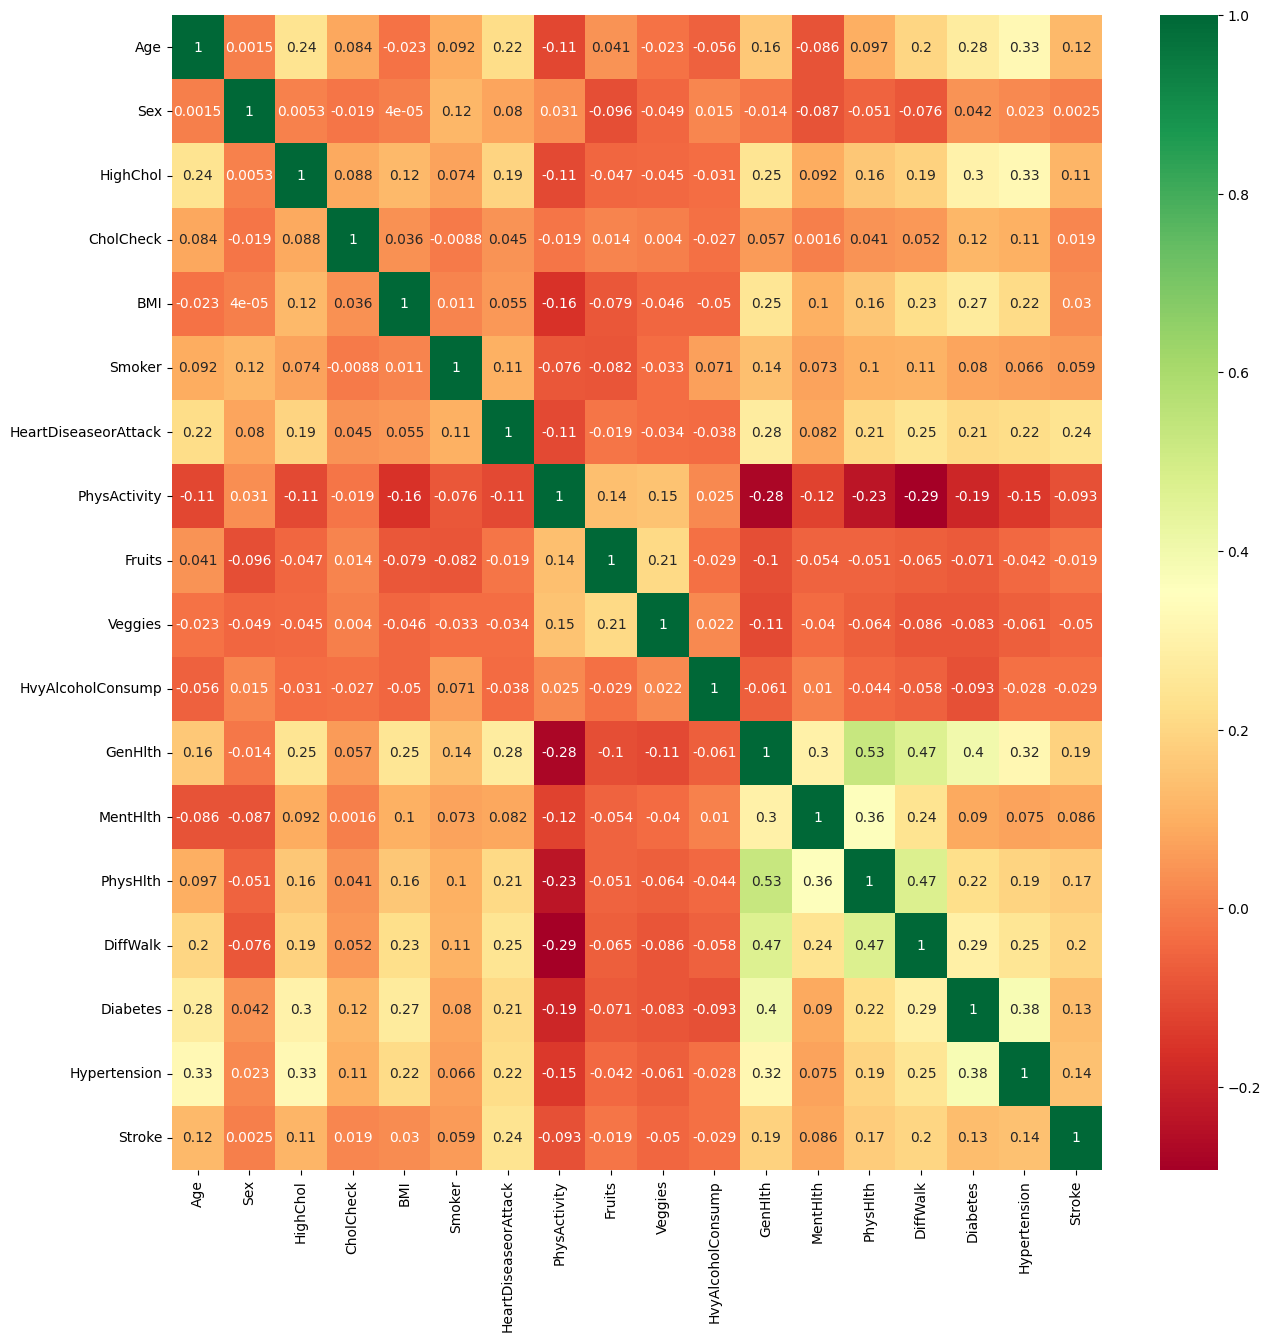

In [ ]:
# plotting the correlation matrix among all the features
corrmat = ds.corr() # correlation matrix
top_corr_features = corrmat.index #columns labels

plt.figure(figsize = (15, 15)) # setting the figure size

g = sns.heatmap(ds[top_corr_features].corr(), annot = True, cmap = "RdYlGn") # plotting the heatmap

From the correlation heatmap is visibile a moderate positive correlation between GenHlth and the PhysHlth, there is also a weak positive correlation between the GenHlth and DiffWalk. The target feature Diabetes is slightly correlated to Hypertension and GenHlth.

In [21]:
# input features
X = ds.drop(columns=['Hypertension','Diabetes','Stroke'], axis=1)
# target features
y = ds['Diabetes']
y_stroke = ds['Stroke']
y_hyp = ds['Hypertension']

In [ ]:

y.shape

(40108,)

In [ ]:
X.head()

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0    4    1         0          1   26       0                     0   
1    8    0         0          1   29       1                     0   
2    3    0         0          1   32       0                     0   
3   12    0         1          1   24       1                     1   
4   10    1         0          1   58       0                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             1       1        1                  0        2         0   
2             1       1        1                  0        3         0   
3             1       1        1                  0        3         0   
4             0       1        1                  0        3         3   

   PhysHlth  DiffWalk  
0        30         0  
1         0         0  
2         0         0  
3         4         0  
4         3         0

### MCA for dimensionality reduction

procedure: https://arxiv.org/pdf/2201.13280.pdf#:~:text=Most%20distance%20metrics%2C%20and%20hence,both%20continuous%20and%20categorical%20variables.
one hot encode all the variables, apply the dimensionality reduction, and then fit_trasform

mca: https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1

https://maxhalford.github.io/prince/mca/



In [22]:
pip install prince --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import prince
from prince import MCA
xx = MCA(n_components = 10, n_iter = 4, random_state = 42) # initializing the MCA
xx.fit(X) # fitting the MCA
xxx = xx.transform(X) # transforming with MCA
xxx.head() # first 5 rows

0         1         2         3         4         5         6  \
0 -0.106862 -0.165730  0.058881 -0.201329  0.237582 -0.038656 -0.024944   
1 -0.396701 -0.048766 -0.129454  0.146865 -0.051357  0.040266 -0.137040   
2 -0.486425 -0.101225 -0.054136  0.092781  0.092012  0.054066  0.026944   
3  0.060454  0.296833 -0.233912  0.313836  0.027241 -0.224718  0.095778   
4  0.107148 -0.430847  0.508516 -0.141537 -0.826896  0.410690 -0.315835   

          7         8         9  
0 -0.004352 -0.313373  0.186942  
1 -0.105562 -0.163756 -0.154708  
2 -0.098527 -0.016022 -0.121595  
3  0.015924  0.264360  0.158799  
4 -0.082461  0.907792  0.095950

In [ ]:
xxx.shape

(40108, 10)

In [24]:
# Calculating the eigenvalues
eigenvalues = xx.eigenvalues_

# Calculating the explained inertia
explained_inertia = eigenvalues / np.sum(eigenvalues)

# Printing the explained inertia for each component
for component, inertia in enumerate(explained_inertia):
    print(f"Component {component + 1}: {inertia*100:.2f}%")

Component 1: 22.05%
Component 2: 10.90%
Component 3: 9.57%
Component 4: 8.94%
Component 5: 8.51%
Component 6: 8.19%
Component 7: 8.13%
Component 8: 7.96%
Component 9: 7.92%
Component 10: 7.84%


In [25]:
# keeping only the first 5 columns cause of RAM issues, in this way we keep about 60% of variance explained
X = xxx.iloc[:, :5]
X.head()

0         1         2         3         4
0 -0.106862 -0.165730  0.058881 -0.201329  0.237582
1 -0.396701 -0.048766 -0.129454  0.146865 -0.051357
2 -0.486425 -0.101225 -0.054136  0.092781  0.092012
3  0.060454  0.296833 -0.233912  0.313836  0.027241
4  0.107148 -0.430847  0.508516 -0.141537 -0.826896

In [26]:
# reducing the dataset due to RAM issues
X = X[20108:40108]
y = y[20108:40108]
y_stroke = y_stroke[20108:40108]
y_hyp = y_hyp[20108:40108]

computing the distance matrix

In [ ]:
# eucliden distance for THE reduced DATASET
from scipy.spatial.distance import pdist, squareform

d_matrix=squareform(pdist(X, metric = 'euclidean')).round(3)
d_matrix

array([[0.   , 1.424, 0.519, ..., 0.608, 1.534, 1.505],
       [1.424, 0.   , 1.322, ..., 0.85 , 0.366, 0.662],
       [0.519, 1.322, 0.   , ..., 0.71 , 1.414, 1.548],
       ...,
       [0.608, 0.85 , 0.71 , ..., 0.   , 1.019, 1.015],
       [1.534, 0.366, 1.414, ..., 1.019, 0.   , 0.776],
       [1.505, 0.662, 1.548, ..., 1.015, 0.776, 0.   ]])

In [ ]:
d_matrix.shape

(20000, 20000)

In [ ]:
# Initialize variables
selected_columns = []
num_columns = d_matrix.shape[1]

# Calculate the threshold value as 80% of the maximum value across all columns
threshold = 0.9 * np.max(d_matrix)

# Iterate over each column
for col_index in range(num_columns):
    max_value = np.max(d_matrix[:, col_index])
    if max_value > threshold:
        selected_columns.append(col_index)

# Print the selected columns
print(selected_columns)

[0, 2, 3, 22, 53, 78, 79, 87, 117, 142, 145, 149, 172, 193, 200, 209, 219, 224, 265, 277, 280, 283, 291, 300, 335, 353, 360, 380, 396, 409, 413, 420, 438, 444, 452, 455, 464, 469, 472, 480, 499, 503, 514, 518, 533, 542, 560, 588, 614, 622, 624, 649, 655, 661, 676, 680, 685, 693, 711, 719, 725, 748, 761, 778, 805, 806, 812, 859, 896, 913, 934, 981, 993, 1006, 1028, 1038, 1046, 1048, 1055, 1104, 1106, 1112, 1122, 1129, 1133, 1177, 1186, 1214, 1254, 1276, 1287, 1313, 1315, 1332, 1352, 1354, 1366, 1383, 1418, 1443, 1488, 1498, 1523, 1525, 1561, 1580, 1619, 1643, 1687, 1754, 1760, 1766, 1788, 1797, 1799, 1801, 1802, 1806, 1812, 1821, 1841, 1845, 1847, 1871, 1881, 1886, 1907, 1924, 1993, 2008, 2037, 2055, 2148, 2162, 2184, 2194, 2211, 2248, 2256, 2258, 2292, 2314, 2333, 2350, 2367, 2375, 2403, 2475, 2485, 2493, 2496, 2511, 2532, 2549, 2556, 2606, 2614, 2622, 2627, 2645, 2675, 2680, 2737, 2778, 2801, 2813, 2833, 2844, 2906, 2914, 2924, 2944, 2945, 2952, 2972, 2974, 2994, 3002, 3017, 3018, 302

In [ ]:
#M, N = matrix.shape
M, N = X.shape
M

20000

In [ ]:
#vmax = np.max(matrix)
#vmin = np.min(matrix)
vmax = np.max(d_matrix) # max value
vmin = np.min(d_matrix) # min value
vmin

0.0

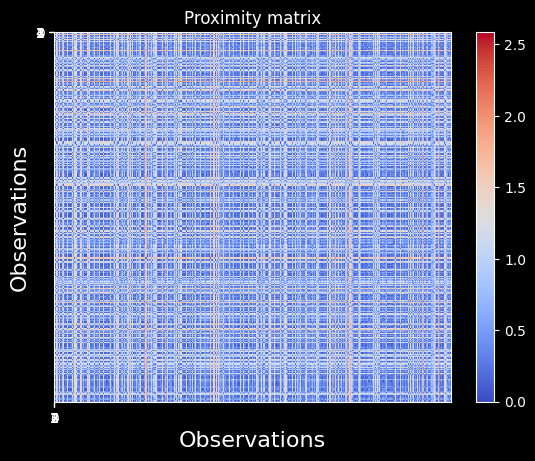

In [ ]:
# Plot the proximity matrix as an image
plt.style.use('dark_background')

im_pmdist = plt.imshow(d_matrix, interpolation='nearest', aspect='auto', cmap='coolwarm', vmin=vmin, vmax=vmax)

plt.colorbar() # adding colorbar

plt.xlabel('Observations', fontsize=16) # setting the x label
plt.xticks(np.arange(0, N, step=1)) # setting the x ticks
plt.ylabel('Observations', fontsize=16) # setting the y label
plt.yticks(np.arange(0, N, step=1)) # setting the y ticks
plt.title('Proximity matrix') # setting the title

plt.show() # showing the plot

In [ ]:
X.columns = ['1','2','3','4','5']
X.head()

1         2         3         4         5
20108  0.505668 -0.824663 -0.138265 -0.000395  0.133642
20109 -0.290230  0.211010  0.009615 -0.020586 -0.094057
20110  0.478095 -0.802684 -0.184421  0.001404  0.094416
20111  0.479302 -0.803990 -0.081749 -0.008651 -0.086313
20112  0.354710 -0.681448 -0.019457 -0.028165  0.072299

## **TASK 2**

> Develop software code for learning at least two types of clustering algorithms on the given dataset — when clustering, ignore the following variables; Hypertension, Stroke and Diabetes

In [27]:
def clustering_evaluation(X, centers, labels):

  '''
  INPUT
  X       - data matrix for which to compute the proximity matrix
  centers - cluster centres from the clustering solution applied to X
  labels  - predicted labels from the clustering solution applied to X
  '''

  '''
  OUTPUT
  PM - proximity matrix computed on X (using euclidean distance metric)
  d  - average distance between pairs of objects in each cluster
  D  - inter-cluster distances
  '''

  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf

  METRIC = 'euclidean'
  PM = pdist(X, metric=METRIC)
  PM = sf(PM).round(2)

  # ntra-cluster distances (average over all pairwise distances) -----------------
  # You could alternatively compute this measure as the average distance of all points from its centroid.
  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(kmeans.labels_ == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the three clusters are: ", d.round(2))
  # ------------------ CORRECTED CODE FOR INTER-CLUSTER DISTANCE --------------------------------

  # Inter-cluster distance
  D = pdist(centers, metric=METRIC)
  D = sf(D).round(2)

  print("The inter-cluster distances are:\n |dist(C_0,C_1)| = %.2f \n |dist(C_0,C_2)| = %.2f \n |dist(C_1,C_2)| = %.2f " % (D[0,1].round(2), D[0,2].round(2), D[1,2].round(2)))

  return PM, d, D

1) Hierarchical clustering

In [28]:
# Import useful packages for clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

In [29]:
# Choose the parameters to run hierarchical clustering (the metric to compute the distance between instances/clusters and the method to merge clusters)
method_merging = 'average'
distance_metric = 'euclidean'

In [ ]:
# Apply the algorithm to obtain the hierarchy
  # input - instances with their features, metric, method
  # output - condensed distance matrix, Z
Z = hierarchy.linkage(X, method_merging, metric = distance_metric, optimal_ordering = 'true')
# optimal_ordering = 'true' is responsable of a very slow computation

In [ ]:
# that's why we save the matrix in a .npy file
np.save('/content/drive/MyDrive/Master degree AI/Unsupervised Learning/UNSUP_PROJ/matrix.npy', Z)

In [ ]:
Z = np.load('/content/drive/MyDrive/Master degree AI/Unsupervised Learning/UNSUP_PROJ/matrix.npy')

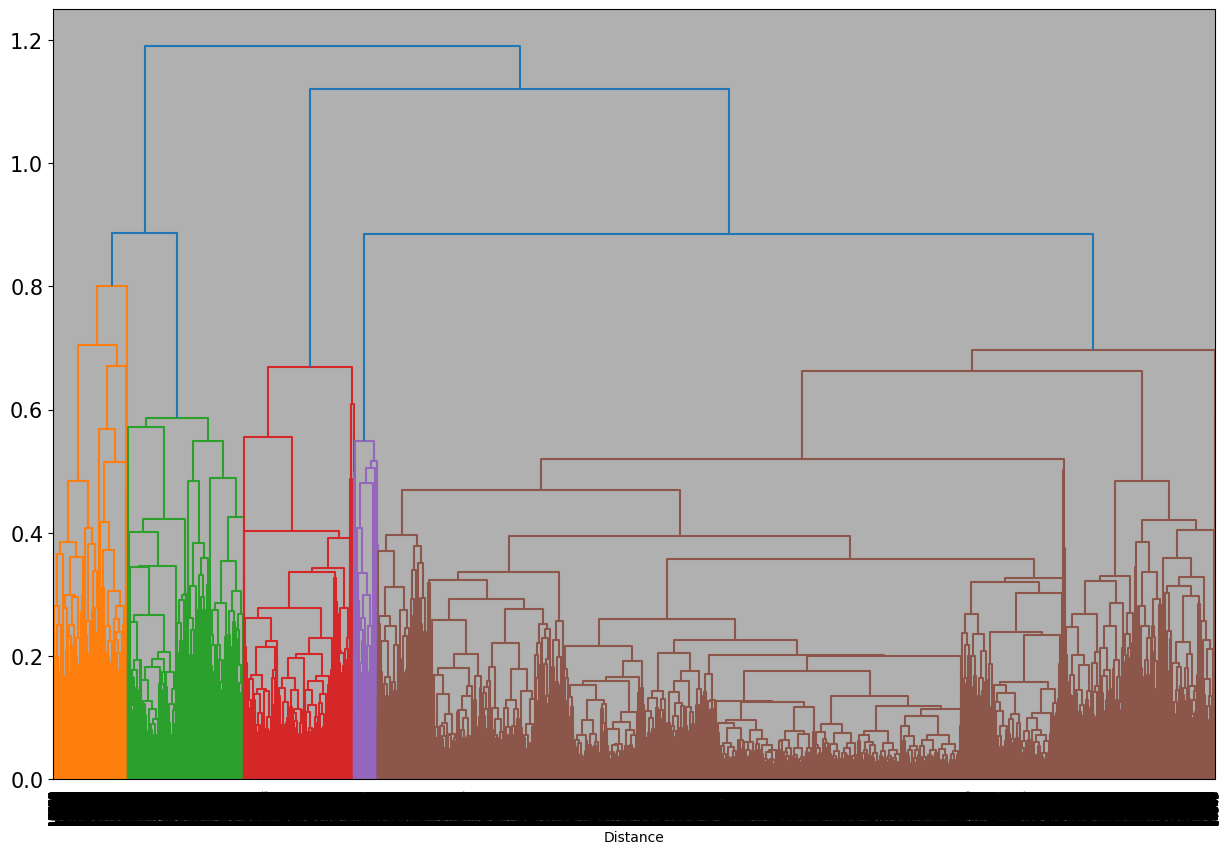

In [ ]:
# Visualize the DENDROGRAM of the corresponding clustering

fig1 = plt.figure(figsize = (15, 10)) # setting the figure size
dh = hierarchy.dendrogram(Z, no_plot = 0) # plotting the dendrogram
plt.tick_params(axis = 'y', which = 'major', labelsize = 15) # setting the ticks
plt.tick_params(axis = 'x', which = 'major', labelsize = 8) # setting the ticks
plt.xlabel('Distance') # setting the x label
plt.grid() # adding grid
plt.show() # showing the plot

In [ ]:
# Cut the forest to have a certain inter-cluster distance (max_d)
max_d = 1.0

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Form the clusters
labels_h = fcluster(Z, max_d, criterion='distance')

#print(labels.shape)
#print(labels)

# Confirm that you cut correctly, to have N clusters
K = labels_h.max()
print("We got %d cluster(s)." % K)

We got 3 cluster(s).


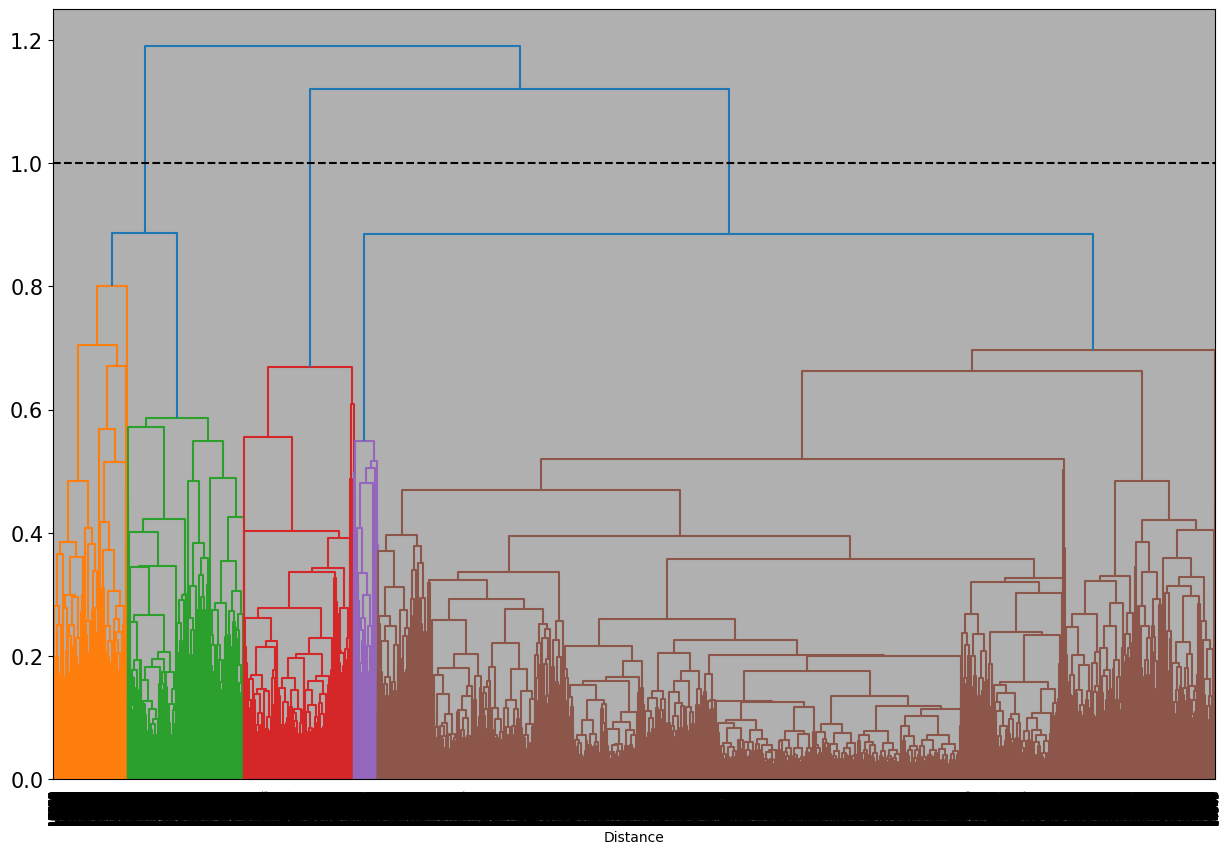

In [ ]:
# Adding a vertical line to the dendrogram indicating the cut
plt.figure(fig1)
plt.axhline(y = max_d, color = 'k', linestyle = '--')
plt.show()

In [ ]:

[N,M] = np.shape(X)

In [ ]:
# Find centers
centers = np.zeros((K, M)) # K is the number of clusters
print("\nWe need to compute %d centroids, as we have %d clusters." % (K, K) )
for k in range(1, K+1):
  ind = np.array(np.where(labels_h == k)[0]) # indices of objects in cluster
  #print(ind.shape)
  #break # only one cluster
  cluster_points = X.iloc[ind,:] # points in cluster
  centers[k-1, :] = np.mean(cluster_points, axis=0) # computing the centroid
  #print("The centroid of cluster %d has coordinates: " % (k-1), *centers[k-1,:].round(2))


We need to compute 3 centroids, as we have 3 clusters.


In [ ]:
labels_h.shape

(20000,)

<ipython-input-61-a59c2b1393f2>:7: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = labels_h, palette = PAL) # plotting the scatterplot


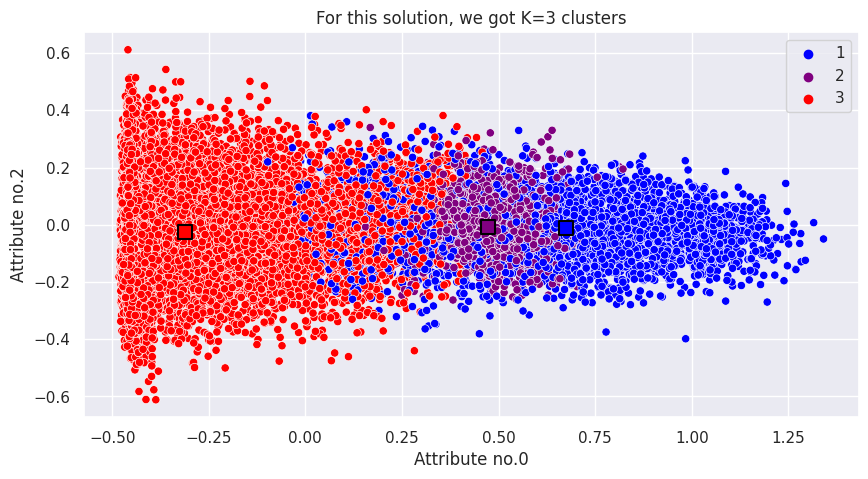

In [ ]:
# Scatterplot the dataset with this clustering solution

feat1 = 0 # feature no.
feat2 = 2 # feature no.
fig5 = plt.figure('Scatterplot with clusters form by cutting the dendrogram at %.2f' % max_d, figsize = (10,5))  # setting the figure size
PAL = ['blue', 'purple', 'red', 'black', 'green', 'orange', 'yellow','lightblue','cyan']#'lightgreen','grey','brown','darkblue'
sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = labels_h, palette = PAL) # plotting the scatterplot
for k in range(K): # plotting the points
   plt.scatter(x=centers[k, feat1], y = centers[k, feat2], s = 100, marker = 's', edgecolor = 'black', linewidth = 1.5, color = PAL[k])
sns.set_theme(style = 'dark') # setting the style
plt.xlabel('Attribute no.%s' % feat1) # setting the x label
plt.ylabel('Attribute no.%s' % feat2) # setting the y label
plt.title("For this solution, we got K=%d clusters" % K) # setting the title
plt.grid() # adding grid
plt.show() # showing the plot

In [ ]:
# Intra-cluster distances (average over all pairwise distances) -----------------
PMh = pdist(X, metric = distance_metric) # pairwise distances
PMh = sf(PMh).round(2) # symmetric matrix

dh = np.zeros(K) # intra-cluster distances
for k in range(1, K+1):     # K is the number of clusters
  ind = np.array(np.where(labels_h == k ))  # indices of objects in cluster
  for r in range(ind.size): # indices of objects
    dh[k-1] = dh[k-1] + np.sum(PMh[[ind[0][r]], [ind]]) # summing the pairwise distances
  dh[k-1] = dh[k-1] / 2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
  dh[k-1] = dh[k-1] / ( (ind.size * (ind.size-1)) / 2)            # to compute the average among N*(N-1)/2 possible unique pairs
print("The intra-cluster distance of the clusters are: ", dh.round(2))

The intra-cluster distance of the clusters are:  [0.68 0.29 0.45]


In [ ]:

# Inter-cluster distance ---------------------------------------------------
Dh = pdist(centers, metric = distance_metric)
Dh = sf(Dh).round(2)

# print("The first three inter-cluster distances are:\n |dist(C_0,C_1)| = %.2f \n |dist(C_0,C_2)| = %.2f \n |dist(C_1,C_2)| = %.2f " % (D[0,1].round(2), D[0,2].round(2), D[1,2].round(2)))

print("All inter-cluster distances organized as proximity matrix:\n", Dh)

All inter-cluster distances organized as proximity matrix:
 [[0.   0.35 0.71]
 [0.35 0.   0.7 ]
 [0.71 0.7  0.  ]]


The **Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is
* (b - a) / max(a, b)

To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This sklearn function returns the mean Silhouette Coefficient over all samples.
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
# Compute all individual silhouette coefficients
from sklearn.metrics import silhouette_score

# Compute S
S = silhouette_score(X, labels_h, metric=distance_metric)

# Print the score
print( 'For %d clusters,' % K, 'the silhouette score is = %.3f.' % S)

For 3 clusters, the silhouette score is = 0.518.


A supervised metric: **rand index**

The *Rand Index* computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is:

* RI = (number of agreeing pairs) / (number of pairs)

The *adjusted Rand Index* is a symmetric similirity measure:

* ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation). The adjusted Rand index is bounded below by -0.5 for especially discordant clusterings.

In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, labels_h)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, labels_h)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, labels_h)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, labels_h)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, labels_h)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, labels_h)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = -0.033
RI for hypertension = 0.493
ARI for stroke = 0.075
RI for stroke = 0.591
ARI for diabetes = -0.071
RI for diabetes = 0.522


### 2) kmeans

In [ ]:
from sklearn.cluster import KMeans
# set the random seed so that it is repetable
np.random.seed(104)

K=3 # try with 3 clusters
# (k-means) Single run with a single seeds initialization
kmeans = KMeans(n_clusters=K, init='random', n_init=1, max_iter=300, tol=0.0001, verbose=1, random_state=104).fit(X)

# The final SSE of this clustering solution can be retrieved by the KMeans attribute (i.e., output) named kmeans.inertia_
print('For this clustering solution (one single k-means run), the final SSE is: %.2f '% kmeans.inertia_)


Initialization complete
Iteration 0, inertia 3463.453983365238.
Iteration 1, inertia 2410.6104010931945.
Iteration 2, inertia 2363.588388276635.
Iteration 3, inertia 2359.441480491812.
Iteration 4, inertia 2359.0617971563747.
Converged at iteration 4: center shift 6.598900656272735e-06 within tolerance 7.663923774557543e-06.
For this clustering solution (one single k-means run), the final SSE is: 2359.02 


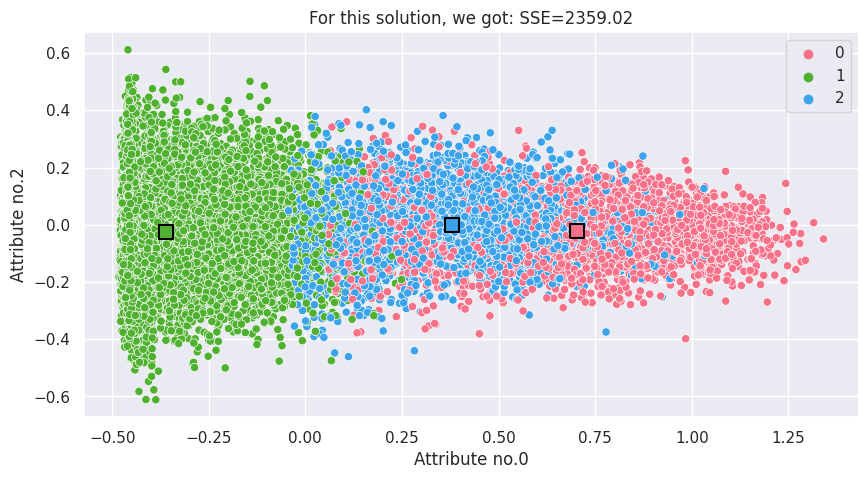

In [ ]:
feat1 = 0 # feature no.
feat2 = 2 # feature no.
fig1 = plt.figure('Single run - Random seeds initialization', figsize = (10, 5))  # setting the figure size
PAL = sns.color_palette('husl', K) # setting the color palette
sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = kmeans.labels_, palette = PAL) # plotting the scatterplot
for k in range(K): # plotting the points
   plt.scatter(x = kmeans.cluster_centers_[k, feat1], y = kmeans.cluster_centers_[k, feat2], s = 100, color = PAL[k], marker = 's', edgecolor = 'black', linewidth = 1.5)
sns.set_theme(style = 'dark') # setting the style
plt.xlabel('Attribute no.%s' % feat1) # setting the x label
plt.ylabel('Attribute no.%s' % feat2) # setting the y label
plt.title("For this solution, we got: SSE=%.2f" % kmeans.inertia_) # setting the title
plt.grid() # adding grid
plt.show() # showing the plot

In [ ]:
PM, d, D = clustering_evaluation(X, kmeans.cluster_centers_, kmeans.labels_) # computing the pairwise distances

The intra-cluster distance of the three clusters are:  [0.62 0.38 0.45]
The inter-cluster distances are:
 |dist(C_0,C_1)| = 1.14 
 |dist(C_0,C_2)| = 1.06 
 |dist(C_1,C_2)| = 0.96 


In [ ]:
#saving the error
WORST_SSE = kmeans.inertia_
WORST_SSE

2359.0246984663904

In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, kmeans.labels_)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, kmeans.labels_)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, kmeans.labels_)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, kmeans.labels_)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, kmeans.labels_)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, kmeans.labels_)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = -0.013
RI for hypertension = 0.483
ARI for stroke = 0.059
RI for stroke = 0.472
ARI for diabetes = -0.054
RI for diabetes = 0.414


## **TASK 3**

> Develop a software code for comparing the performance of different types of clustering algorithms and/or
different instances of the same type of algortihm, i.e., when changing the parameters value (k for k-means,
eps and minpts for DBSCAN, etc…). Both supervised and unsupervised performance measures must be
made available, at least a couple of them for each class of clustering performance measures. In this case
use one by one the following three variables: Hypertension, Stroke and Diabetes, for supervised
performance evaluation.

In [ ]:
method_merging = 'ward' # 'single', 'complete', 'average', 'weighted'
distance_metric = 'euclidean' # 'euclidean', 'manhattan', 'minkowski'


In [ ]:
Z = hierarchy.linkage(X, method_merging, metric = distance_metric, optimal_ordering = 'true') # hierarchical clustering

In [ ]:
np.save('/content/drive/MyDrive/Master degree AI/Unsupervised Learning/UNSUP_PROJ/matrix1.npy', Z)

In [30]:
Z = np.load('/content/drive/MyDrive/Master degree AI/Unsupervised Learning/UNSUP_PROJ/matrix1.npy')

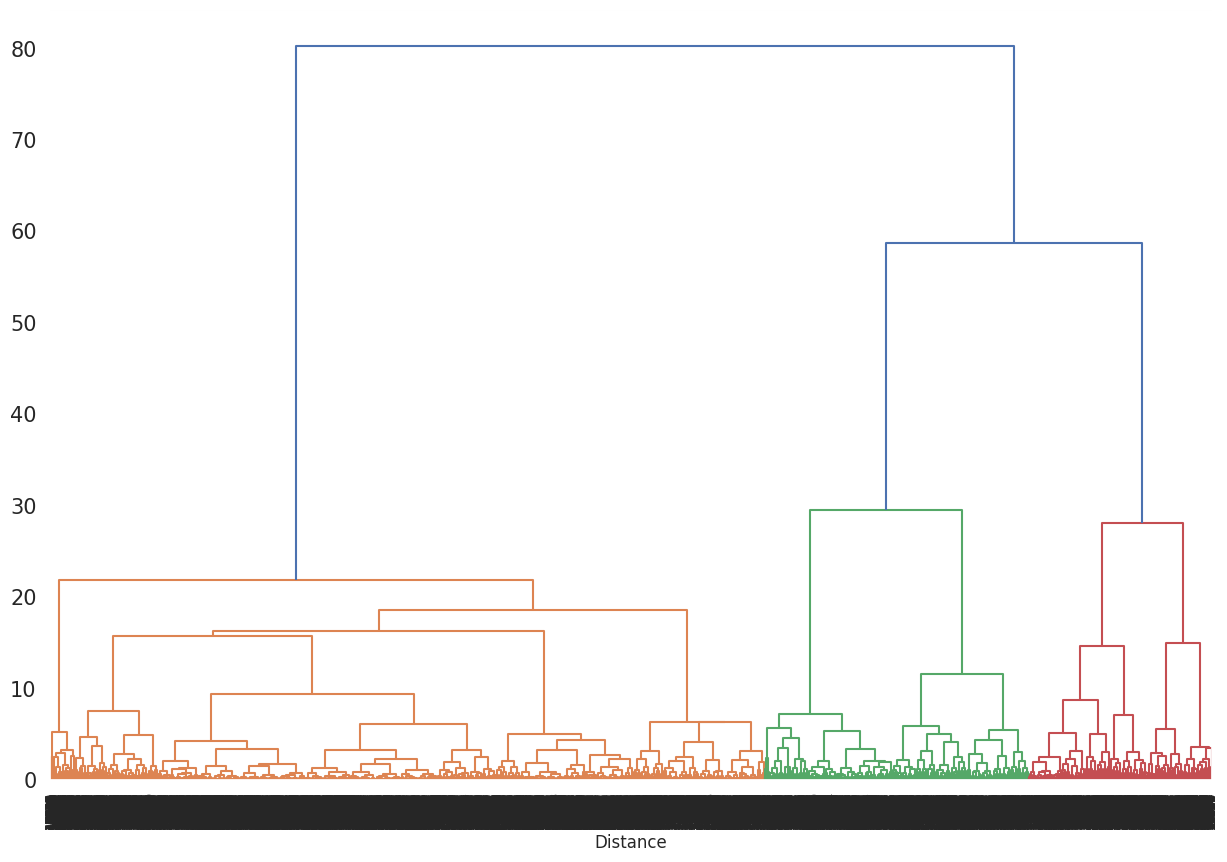

In [ ]:
fig_jh = plt.figure(figsize = (15, 10)) # setting the figure size
dn = hierarchy.dendrogram(Z, no_plot=0) # plotting the dendrogram
plt.tick_params(axis = 'y', which = 'major', labelsize=15) # setting the ticks
plt.tick_params(axis = 'x', which = 'major', labelsize=8) # setting the ticks
plt.xlabel('Distance') # setting the x label
plt.grid() # adding grid
plt.show() # showing the plot

In [32]:
from scipy.cluster.hierarchy import fcluster
max_d = 30
# Form the clusters
labels_jh = fcluster(Z, max_d, criterion='distance')

#print(labels.shape)
#print(labels)

# Confirm that you cut correctly, to have N clusters
K_jh = labels_jh.max()
print("We got %d cluster(s)." % K_jh)

We got 3 cluster(s).


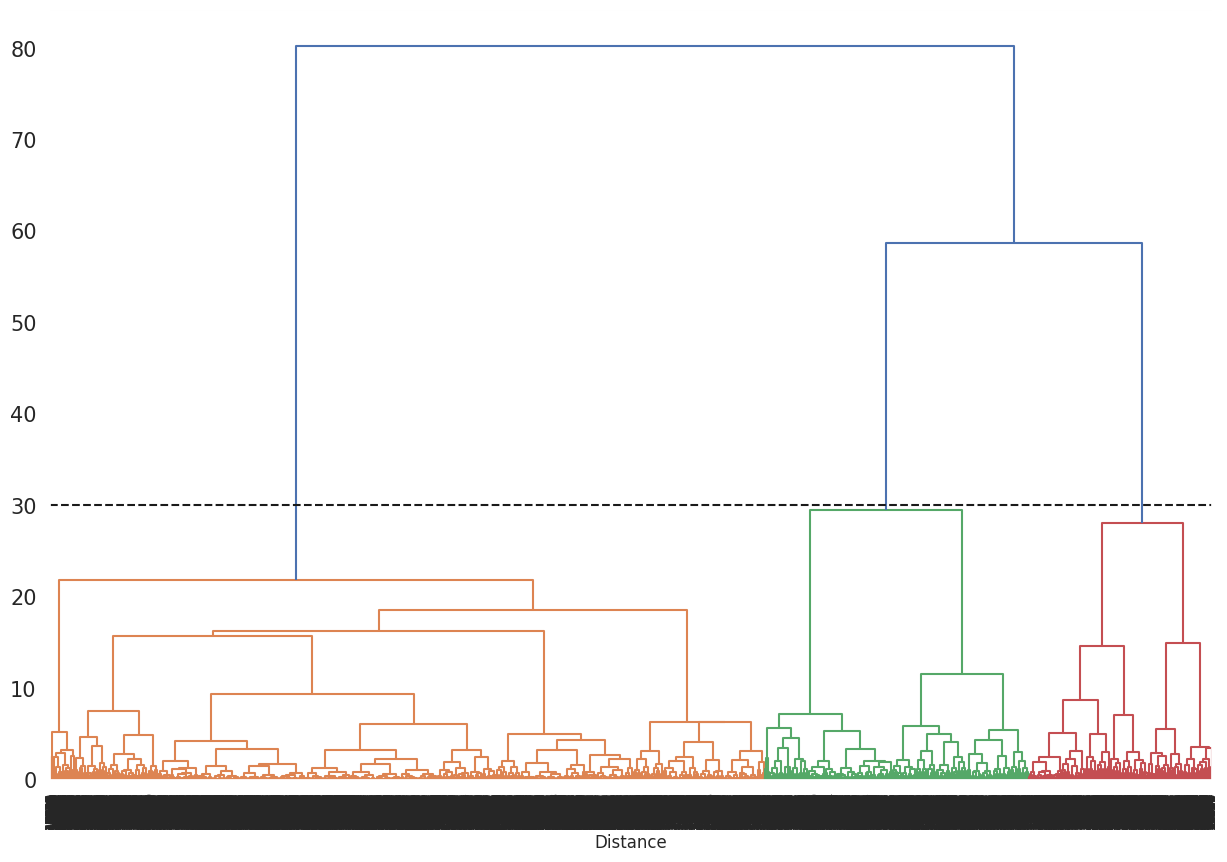

In [ ]:
[N,M] = np.shape(X)
# Adding a vertical line to the dendrogram indicating the cut
plt.figure(fig_jh)
plt.axhline(y=max_d, color='k', linestyle='--')
plt.show()

In [ ]:
centers = np.zeros((K_jh, M)) # initializing the centers
print("\nWe need to compute %d centroids, as we have %d clusters." % (K_jh, K_jh) ) # K_jh is the number of clusters
for k in range(1, K_jh+1):
  ind = np.array( np.where(labels_jh == k )[0] ) # indices of objects in cluster
  cluster_points = X.iloc[ind,:] # coordinates of objects
  centers[k-1,:] = cluster_points.mean(axis=0)  # computing the mean
  print("The centroid of cluster %d has coordinates: " % (k-1), *centers[k-1,:].round(2)) # printing the coordinates


We need to compute 3 centroids, as we have 3 clusters.
The centroid of cluster 0 has coordinates:  -0.38 0.05 -0.03 -0.01 0.03
The centroid of cluster 1 has coordinates:  0.22 -0.49 -0.0 -0.01 0.01
The centroid of cluster 2 has coordinates:  0.69 0.35 -0.01 -0.02 0.01


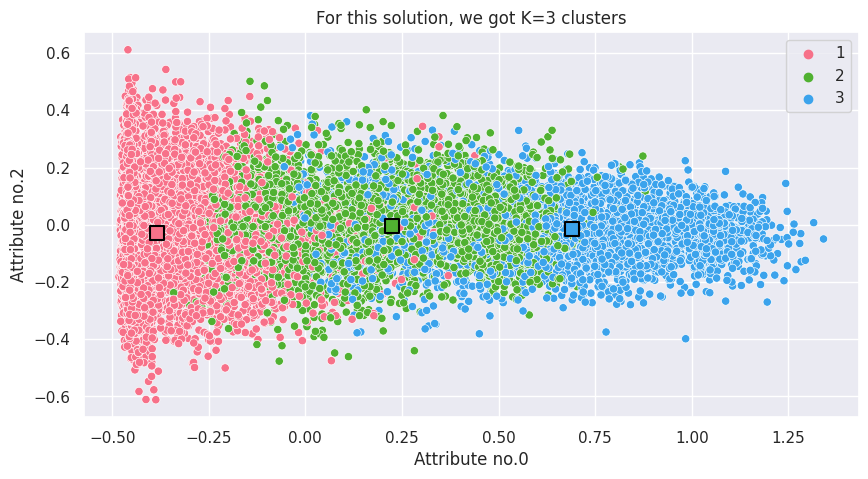

In [ ]:
feat1 = 0 # feature no.
feat2 = 2 # feature no.
fig5 = plt.figure('Scatterplot with clusters form by cutting the dendrogram at %.2f' % max_d, figsize = (10,5)) # setting the figure size
#PAL = ['blue', 'purple', 'red', 'black', 'green', 'orange', 'yellow']
PAL = sns.color_palette('husl', K_jh) # setting the color palette
sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = labels_jh, palette = PAL) # plotting the scatterplot
for k in range(K_jh): # plotting the points
   plt.scatter(x=centers[k, feat1], y = centers[k, feat2], s = 100, marker = 's', edgecolor = 'black', linewidth = 1.5, color = PAL[k]) # plotting the points
sns.set_theme(style = 'dark') # setting the style
plt.xlabel('Attribute no.%s' % feat1) # setting the x label
plt.ylabel('Attribute no.%s' % feat2) # setting the y label
plt.title("For this solution, we got K=%d clusters" % K_jh) # setting the title
plt.grid() # adding grid
plt.show() # showing the plot

In [ ]:
# Intra-cluster distances (average over all pairwise distances) -----------------
PM = pdist(X, metric = distance_metric) # computing the pairwise distances
PM = sf(PM).round(2) # symmetrizing the matrix

d = np.zeros(K_jh) # initializing the intra-cluster distances
for k in range(1, K_jh+1):     # computing the intra-cluster distances
  ind = np.array( np.where(labels_jh == k ) )  # indices of objects in cluster
  for r in range(ind.size): # computing the intra-cluster distance
    d[k-1] = d[k-1] + np.sum( PM[ [ind[0][r]], [ind] ] ) # computing the intra-cluster distance
  d[k-1] = d[k-1]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
  d[k-1] = d[k-1]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
print("The intra-cluster distance of the three clusters are: ", d.round(2))
# Inter-cluster distance ---------------------------------------------------
D = pdist(centers, metric=distance_metric) # computing the pairwise distances
D = sf(D).round(2)  # symmetrizing the matrix

# print("The first three inter-cluster distances are:\n |dist(C_0,C_1)| = %.2f \n |dist(C_0,C_2)| = %.2f \n |dist(C_1,C_2)| = %.2f " % (D[0,1].round(2), D[0,2].round(2), D[1,2].round(2)))

print("All inter-cluster distances organized as proximity matrix:\n", D)
# Compute all individual silhouette coefficients
from sklearn.metrics import silhouette_score

# Compute Silhouette score
S = silhouette_score(X, labels_jh, metric=distance_metric)

# Print the score
print( 'For %d clusters,' % K_jh, 'the silhouette score is = %.3f.' % S)

The intra-cluster distance of the three clusters are:  [0.37 0.52 0.67]
All inter-cluster distances organized as proximity matrix:
 [[0.   0.82 1.12]
 [0.82 0.   0.96]
 [1.12 0.96 0.  ]]
For 3 clusters, the silhouette score is = 0.487.


In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, labels_jh)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, labels_jh)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, labels_jh)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, labels_jh)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, labels_jh)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, labels_jh)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = -0.024
RI for hypertension = 0.483
ARI for stroke = 0.048
RI for stroke = 0.495
ARI for diabetes = -0.052
RI for diabetes = 0.444


now we try with the agglomerative clustering algorithm

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as hierarchy
import matplotlib.pyplot as plt

# Define the agglomerative clustering algorithm
clustering = AgglomerativeClustering(n_clusters=2, distance_threshold=None, metric=distance_metric, linkage='ward')

# Fit the clustering algorithm to the data
clustering.fit(X)

# Obtain the cluster labels for each instance
labels_agg = clustering.labels_

# Calculate the silhouette score
silhouette_agg = silhouette_score(X, labels_agg).round(2)
silhouette_agg

0.31

In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, labels_agg)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, labels_agg)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, labels_agg)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, labels_agg)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, labels_agg)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, labels_agg)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = -0.022
RI for hypertension = 0.5
ARI for stroke = 0.082
RI for stroke = 0.599
ARI for diabetes = -0.066
RI for diabetes = 0.529


In [ ]:
np.sum(labels_agg==1)

14306

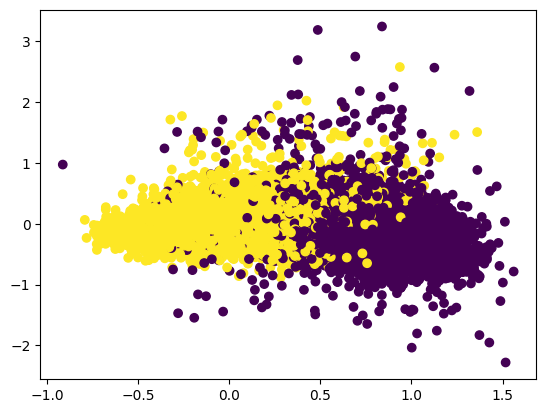

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=labels_agg)
plt.show()

In [ ]:

# Define the agglomerative clustering algorithm
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.001, metric=distance_metric, linkage='complete')

# Fit the clustering algorithm to the data
clustering.fit(X)

# Obtain the cluster labels for each instance
labels_agg = clustering.labels_

# Calculate the silhouette score
silhouette_agg = silhouette_score(X, labels_agg).round(2)
silhouette_agg

0.1

In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, labels_agg)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, labels_agg)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, labels_agg)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, labels_agg)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, labels_agg)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, labels_agg)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = 0.0
RI for hypertension = 0.442
ARI for stroke = 0.0
RI for stroke = 0.159
ARI for diabetes = 0.0
RI for diabetes = 0.185


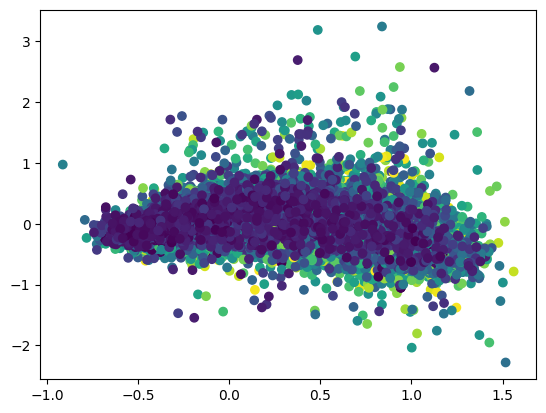

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=labels_agg)
plt.show()

In [ ]:

# Define the agglomerative clustering algorithm
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.22, metric='manhattan', linkage='single')

# Fit the clustering algorithm to the data
clustering.fit(X)

# Obtain the cluster labels for each instance
labels_agg = clustering.labels_

# Calculate the silhouette score
silhouette_agg = silhouette_score(X, labels_agg).round(2)
silhouette_agg

-0.43

In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, labels_agg)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, labels_agg)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, labels_agg)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, labels_agg)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, labels_agg)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, labels_agg)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = -0.034
RI for hypertension = 0.476
ARI for stroke = 0.06
RI for stroke = 0.491
ARI for diabetes = -0.048
RI for diabetes = 0.436


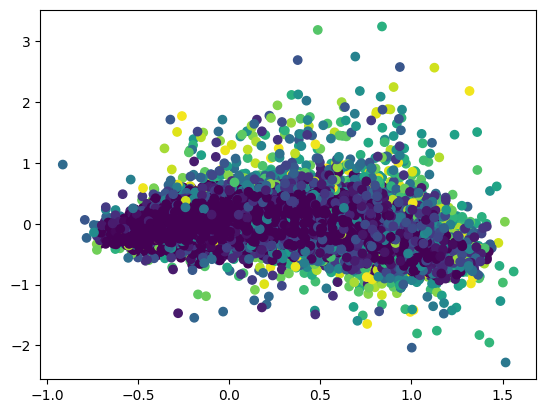

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=labels_agg)
plt.show()

**agglomerative with K=2 and ward linkage**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as hierarchy
import matplotlib.pyplot as plt

# Define the agglomerative clustering algorithm
clustering = AgglomerativeClustering(n_clusters=3, distance_threshold=None, metric=distance_metric, linkage='ward')

# Fit the clustering algorithm to the data
clustering.fit(X)

# Obtain the cluster labels for each instance
labels_agg = clustering.labels_

# Calculate the silhouette score
silhouette_agg = silhouette_score(X, labels_agg).round(2)
silhouette_agg

0.28

In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, labels_agg)
print(f'ARI for hypertension = {np.round(ARI, 3)}')
RI = rand_score(y_hyp, labels_agg)
print(f'RI for hypertension = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y_stroke, labels_agg)
print(f'ARI for stroke = {np.round(ARI, 3)}')
RI = rand_score(y_stroke, labels_agg)
print(f'RI for stroke = {np.round(RI, 3)}')

ARI = adjusted_rand_score(y, labels_agg)
print(f'ARI for diabetes = {np.round(ARI, 3)}')
RI = rand_score(y, labels_agg)
print(f'RI for diabetes = {np.round(RI, 3)}')

ARI for hypertension = -0.041
RI for hypertension = 0.487
ARI for stroke = 0.099
RI for stroke = 0.587
ARI for diabetes = -0.085
RI for diabetes = 0.499


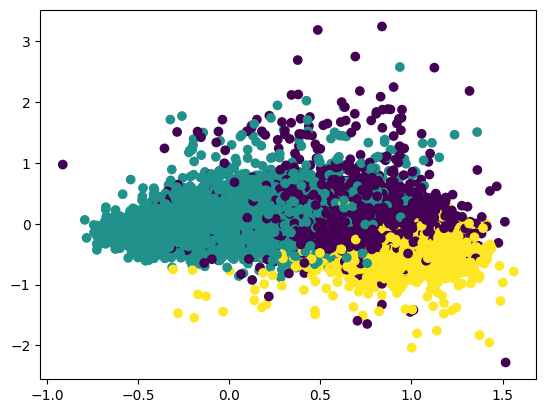

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,2], c=labels_agg)
plt.show()

## **TASK 4**

> Develop a software code for selecting the «optimal number of clusters», in this case different relative
measures must be made available

**Kmeans with elbow method**

In [33]:
from sklearn.cluster import KMeans
# Apply ELBOW METHOD to decide the optimal number of clusters for k-means++
inertia_values = np.zeros(19) # Initialize inertia_values

i=0
for k in range(1, 20): # Iterate from 1 to 20
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=42).fit(X) # Run k-means
    inertia_values[i] = kmeans.inertia_ # Append the inertia
    i=i+1 # Increment i

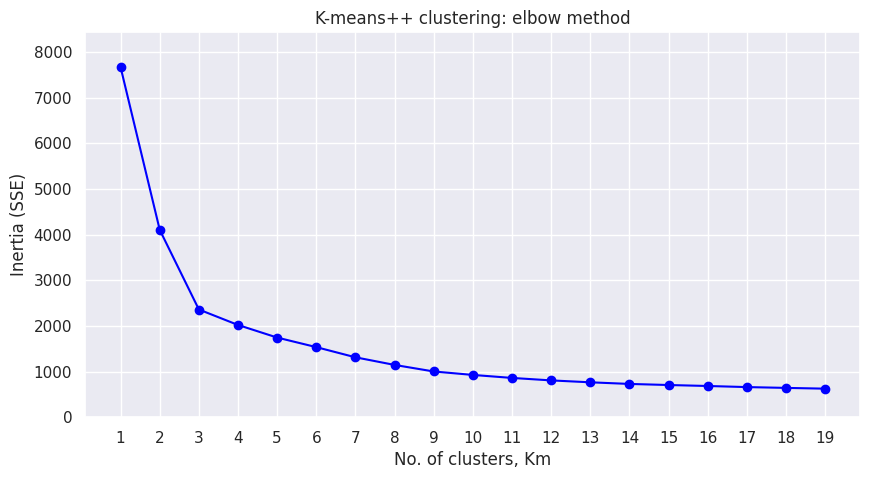

In [ ]:
# Plot for the elbow method
fig10 = plt.figure('K-means++ clustering: the elbow method', figsize=(10, 5)) # Create a figure
plt.plot(range(1, 20), inertia_values, color='blue', marker="o", linestyle="-") # Plot the data
plt.xticks(np.arange(1, 20, step=1)) # Set the xticks
plt.xlabel('No. of clusters, Km') # Set the x label
plt.ylabel('Inertia (SSE)') # Set the y label
plt.ylim([0, 1.1*np.max(inertia_values)]) # Set the y limit
plt.title("K-means++ clustering: elbow method") # Set the title
plt.grid()# Add a grid
plt.show()# Show the plot

In [ ]:
# Set the optimal number of clusters (given the "elbow point" on the plot above) and run the k-means++ algorithm with that choice.
Km = 3 # Set the number of clusters
SSEm = inertia_values[Km] # Set the SSE
print('The best number of clusters is Km=%d with an SSE=%.2f '% (Km, SSEm)) # Print the best number of clusters

The best number of clusters is Km=3 with an SSE=2020.47 


In [34]:
# If Km is different from the one provided by the hierarchical clustering, then run k-means++ with best choice of Km
kmeans = KMeans(n_clusters=Km, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=42).fit(X) # Run k-means
kmeans_labels = kmeans.labels_ # Get the labels

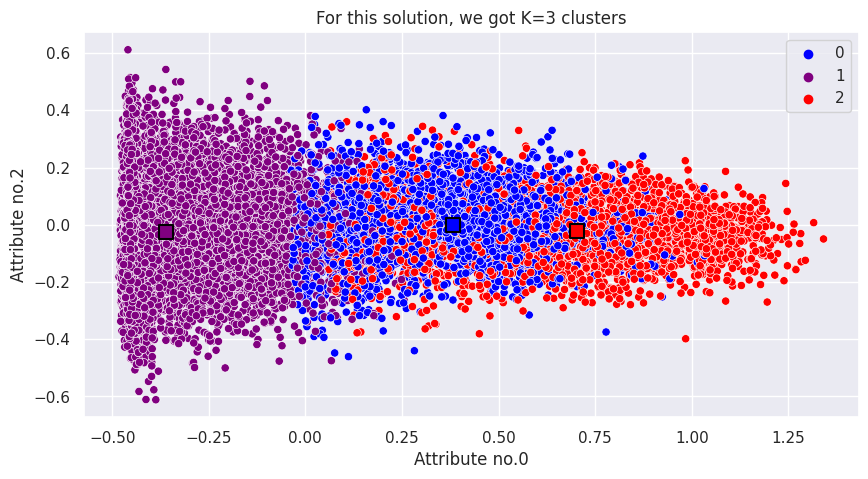

In [ ]:
# Scatterplot the best k-means++ solution (optimal Km).
# Random choice of the features to represent the dataset
fig11 = plt.figure('K-means++ clustering: scatterplot of best solution (elbow point at Km=%d)' % Km, figsize=(10,5)) # Create a figure
PAL = ['blue', 'purple', 'red'] # Palette
feat1=0 # Feature
feat2=2 # Feature
sns.scatterplot(x=X.iloc[:,feat1], y=X.iloc[:,feat2], hue=kmeans_labels, palette=PAL) # Plot the data
for k in range(Km): # For each cluster
  plt.scatter(x=kmeans.cluster_centers_[k,feat1], y=kmeans.cluster_centers_[k,feat2], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5) # Plot the cluster
sns.set_theme(style='dark')# Set the theme
plt.xlabel('Attribute no.%s' % feat1) # Set the x label
plt.ylabel('Attribute no.%s' % feat2) # Set the y label
plt.title("For this solution, we got K=%d clusters" % Km) # Set the title
plt.grid() # Add a grid
plt.show() # Show the plot

In [35]:
kmeans_labels +=1 # so that the labels start from 1, need for comparison later

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# evaluaation on k-means++ clustering
dm, Dm, Sm = single_clustering_evaluation(X, kmeans.cluster_centers_, kmeans_labels, 'euclidean')

The intra-cluster distance of the three clusters are:  [0.45 0.38 0.62]

All inter-cluster distances organized as proximity matrix:
 [[0.   0.96 1.06]
 [0.96 0.   1.14]
 [1.06 1.14 0.  ]]

For this clustering solution (with 3 clusters), the silhouette score is = 0.564.


In [ ]:
# FINAL RESULT ON K-MEANS++ CLUSTERING:
print("With k-means++ clustering, we found an optimal number of clusters equal to Km=%d with a silhouette score of S=%.3f." % (Km, Sm))

With k-means++ clustering, we found an optimal number of clusters equal to Km=3 with a silhouette score of S=0.564.


In [ ]:
# supervised metrics: the rand score and adjusted rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, kmeans_labels)  # Adjusted Rand Index
print(f'ARI for hypertension = {np.round(ARI, 3)}') # Print the adjusted Rand Index
RI = rand_score(y_hyp, kmeans_labels) # Print the rand score
print(f'RI for hypertension = {np.round(RI, 3)}') # Print the rand score

ARI = adjusted_rand_score(y_stroke, kmeans_labels)  # Adjusted Rand Index
print(f'ARI for stroke = {np.round(ARI, 3)}') # Print the adjusted Rand Index
RI = rand_score(y_stroke, kmeans_labels) # Print the rand score
print(f'RI for stroke = {np.round(RI, 3)}') # Print the rand score

ARI = adjusted_rand_score(y, kmeans_labels)  # Adjusted Rand Index
print(f'ARI for diabetes = {np.round(ARI, 3)}') # Print the adjusted Rand Index
RI = rand_score(y, kmeans_labels) # Print the rand score
print(f'RI for diabetes = {np.round(RI, 3)}') # Print the rand score

ARI for hypertension = -0.014
RI for hypertension = 0.483
ARI for stroke = 0.06
RI for stroke = 0.475
ARI for diabetes = -0.055
RI for diabetes = 0.415


In [36]:
hierarchical_labels = labels_jh

In [ ]:
def single_clustering_evaluation(data, cluster_centers, predicted_labels, distance_metric):

  '''
  INPUT
  data              - data matrix for which to compute the proximity matrix
  cluster_centers   - cluster centres from the clustering solution applied to X
  predicted_labels  - predicted labels from the clustering solution applied to X
  distance_metric   - the metric used to compute all distances
  '''

  '''
  OUTPUT
  (PM - proximity matrix computed on X)
  d  - average distance between pairs of objects in each cluster
  D  - inter-cluster distances
  S  - silhouette score (for the entire clustering solution)
  '''

  # Import packages
  from sklearn.metrics import silhouette_score

  # Set the expected number of clusters, K
  K = len(cluster_centers) #expected number of clusters

  # Intra-cluster distances (average over all pairwise distances) -----------------
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(predicted_labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the three clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll inter-cluster distances organized as proximity matrix:\n", D)


  # Silhouette score
  S = silhouette_score(data, predicted_labels, metric=distance_metric)
  print( '\nFor this clustering solution (with %d clusters),' % K, 'the silhouette score is = %.3f.' % S    )


  # return PM, d, D, S
  return d, D, S   # PM has been already computed

## now we try other different types of clusterings

### Gaussian Mixture Model

This model assumes that clusters can be modeled using a Gaussian distribution.

*  These models are useful because Gaussian distributions have well-defined
properties such as the mean, variance and covariance.
*  Gaussian distributions, informally known as bell curves, are functions that
describe many important things like population heights and weights.

*  The mean is just the average value of an input within a cluster.

* Variance measures the fluctuation in values for a single input.
* The covariance is a matrix of statistics describing how inputs are related to each
other and, specifically, how they vary together.

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = 3 # number of clusters
gmm_model = GaussianMixture(n_components=n_clusters) # Gaussian Mixture Model
gmm_model.fit(X) # Fit the model

GaussianMixture(n_components=3)

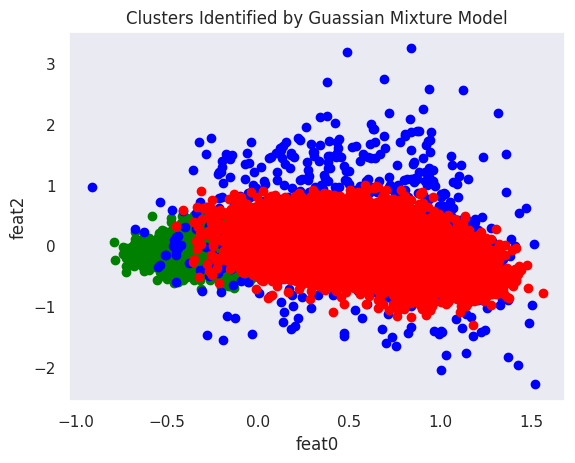

In [ ]:
gmm_labels = gmm_model.predict(X) # Predict the labels
color=['green', 'blue', 'red'] # color for each cluster
for k in range(0, n_clusters): # Plot the clusters
    cluster_points = X[gmm_labels == k] # Select the points belonging to the cluster
    plt.scatter(cluster_points.iloc[:,0], cluster_points.iloc[:, 2], c=color[k]) # Plot the points
plt.title("Clusters Identified by Guassian Mixture Model") # Title
plt.ylabel("feat2") # feature
plt.xlabel("feat0") # feature
plt.show() # Show the plot

In [ ]:
# Intra-cluster distances (average over all pairwise distances) -----------------
PMh = pdist(X, metric = distance_metric) # pairwise distances
PMh = sf(PMh).round(2) # symmetric matrix

dh = np.zeros(K) # intra-cluster distances
for k in range(1, K+1):     # K is the number of clusters
  ind = np.array(np.where(gmm_labels == k ))  # indices of objects in cluster
  for r in range(ind.size): # indices of objects
    dh[k-1] = dh[k-1] + np.sum(PMh[[ind[0][r]], [ind]]) # summing the pairwise distances
  dh[k-1] = dh[k-1] / 2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
  dh[k-1] = dh[k-1] / ( (ind.size * (ind.size-1)) / 2)            # to compute the average among N*(N-1)/2 possible unique pairs
print("The intra-cluster distance of the clusters are: ", dh.round(2))

# Inter-cluster distance ---------------------------------------------------
Dh = pdist(centers, metric = distance_metric)
Dh = sf(Dh).round(2)

# print("The first three inter-cluster distances are:\n |dist(C_0,C_1)| = %.2f \n |dist(C_0,C_2)| = %.2f \n |dist(C_1,C_2)| = %.2f " % (D[0,1].round(2), D[0,2].round(2), D[1,2].round(2)))

print("All inter-cluster distances organized as proximity matrix:\n", Dh)
# Compute all individual silhouette coefficients
from sklearn.metrics import silhouette_score

# Compute S
S = silhouette_score(X, gmm_labels, metric=distance_metric)

# Print the score
print( 'For %d clusters,' % K, 'the silhouette score is = %.3f.' % S)

<ipython-input-65-d4dc4e9a592c>:11: RuntimeWarning: invalid value encountered in double_scalars
  dh[k-1] = dh[k-1] / ( (ind.size * (ind.size-1)) / 2)            # to compute the average among N*(N-1)/2 possible unique pairs


The intra-cluster distance of the clusters are:  [2.2  0.88  nan]
All inter-cluster distances organized as proximity matrix:
 [[0.   0.35 0.71]
 [0.35 0.   0.7 ]
 [0.71 0.7  0.  ]]
For 3 clusters, the silhouette score is = 0.260.


In [ ]:
# a supervised metric: rand score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

ARI = adjusted_rand_score(y_hyp, gmm_labels)  # Adjusted Rand Index
print(f'ARI for hypertension = {np.round(ARI, 3)}') # Print the adjusted Rand Index
RI = rand_score(y_hyp, gmm_labels) # Print the rand score
print(f'RI for hypertension = {np.round(RI, 3)}') # Print the rand score

ARI = adjusted_rand_score(y_stroke, gmm_labels)  #   Adjusted Rand Index
print(f'ARI for stroke = {np.round(ARI, 3)}') # Print the adjusted Rand Index
RI = rand_score(y_stroke, gmm_labels) # Print the rand score
print(f'RI for stroke = {np.round(RI, 3)}') # Print the rand score

ARI = adjusted_rand_score(y, gmm_labels)  #   Adjusted Rand Index
print(f'ARI for diabetes = {np.round(ARI, 3)}') # Print the adjusted Rand Index
RI = rand_score(y, gmm_labels) # Print the rand score
print(f'RI for diabetes = {np.round(RI, 3)}') # Print the rand score

ARI for hypertension = 0.02
RI for hypertension = 0.507
ARI for stroke = 0.032
RI for stroke = 0.496
ARI for diabetes = -0.011
RI for diabetes = 0.476


* Gaussian mixture models are generally more robust and flexible than K-means clustering in
Python. Again, this is because GMM captures complex cluster shapes and K-means does not.
* This allows GMM to accurately identify clusters that are more complex than the
spherical clusters that K-means identifies.
* GMM is an ideal method for data sets of moderate size and complexity because it is better able
to capture clusters in sets that have complex shapes.

### different strategy: k-modes algorithm on the categorical variables

In [ ]:
ds1=ds.drop('BMI', axis=1)

In [ ]:
X.head()

Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
20108   12    0         0          1   27       1                     1   
20109   10    0         0          1   34       1                     0   
20110   13    0         1          1   27       1                     1   
20111   13    0         1          1   28       0                     0   
20112   11    0         1          1   39       0                     1   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
20108             0       0        0                  0        5         0   
20109             1       1        1                  0        3         3   
20110             0       1        0                  0        4         0   
20111             0       1        0                  0        4         0   
20112             1       1        1                  0        5         0   

       PhysHlth  DiffWalk  
20108        30         1  
20109         0         0  
20110        30         1  
20111        30         1  
20112        30         1

In [ ]:
X=X.drop('BMI', axis=1)

In [ ]:
X=X.drop(columns=['BMI','Diabetes', 'Hypertension','Stroke'], axis=1)

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kmodes import KModes
K = 2 #arbitrary
Kmod = KModes(n_clusters=K, init='Huang', n_init=5, verbose=1)
clusters = Kmod.fit_predict(X)
centroids = Kmod.cluster_centroids_
for i, cluster in enumerate(clusters):
  print('data point', X.iloc[i])
  print('cluster', cluster)
  print()
print('cluster centroids')
for centroid in centroids:
  print(centroid)

Output streaming troncato alle ultime 5000 righe.
Sex                     1
HighChol                0
CholCheck               1
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  1
Veggies                 1
HvyAlcoholConsump       0
GenHlth                 2
MentHlth                0
PhysHlth                0
DiffWalk                0
Name: 39814, dtype: int64
cluster 0

data point Age                     10
Sex                      1
HighChol                 1
CholCheck                1
Smoker                   1
HeartDiseaseorAttack     1
PhysActivity             0
Fruits                   1
Veggies                  0
HvyAlcoholConsump        0
GenHlth                  5
MentHlth                30
PhysHlth                14
DiffWalk                 1
Name: 39815, dtype: int64
cluster 1

data point Age                     2
Sex                     1
HighChol                0
CholCheck               1
Smoker                  0
HeartDis

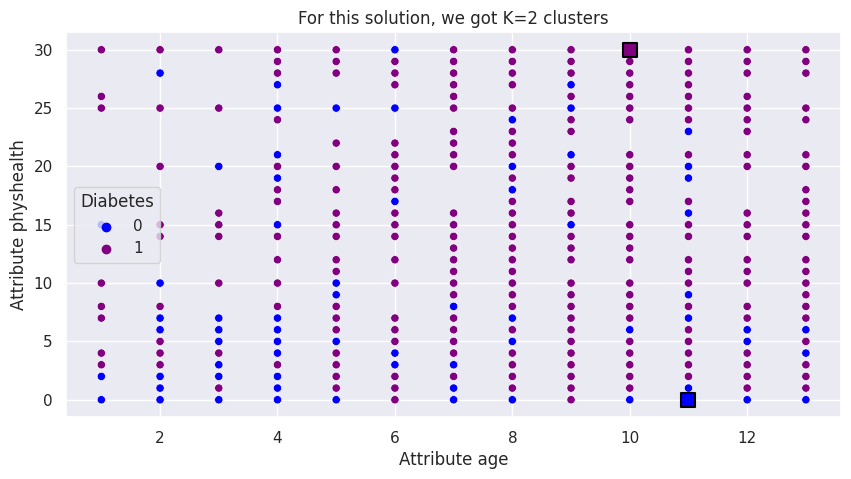

In [ ]:
# Scatterplot the dataset with this clustering solution
figga = plt.figure(figsize=(10,5))
PAL = ['blue', 'purple']
feat1 = 0
feat2 = 12
sns.scatterplot(x=X.iloc[:,feat1], y=X.iloc[:,feat2], hue=y, palette=PAL)
for k in range(K):
   plt.scatter(x=centroids[k,feat1], y=centroids[k,feat2], s=100, marker='s', edgecolor='black', linewidth=1.5, color=PAL[k])
sns.set_theme(style='dark')
plt.xlabel('Attribute age')
plt.ylabel('Attribute physhealth')
plt.title("For this solution, we got K=%d clusters" % K)
plt.grid()
plt.show()

In [ ]:
# Compute all individual silhouette coefficients
from sklearn.metrics import silhouette_score

# Compute S
S = silhouette_score(X, clusters, metric='euclidean')

# Print the score
print( 'For %d clusters,' % K, 'the silhouette score is = %.3f.' % S    )

from sklearn.metrics import rand_score, adjusted_rand_score
RI = rand_score(y_hyp, Kmod.labels_)
ARI = adjusted_rand_score(y_hyp, Kmod.labels_)
(RI, ARI)

For 2 clusters, the silhouette score is = 0.280.


(0.49997812390619534, -0.01707024794867967)

In [ ]:
RI = rand_score(y, Kmod.labels_)
ARI = adjusted_rand_score(y, Kmod.labels_)
(RI, ARI)

(0.5226606330316516, -0.05057049216060466)

In [ ]:
RI = rand_score(y_stroke, Kmod.labels_)
ARI = adjusted_rand_score(y_stroke, Kmod.labels_)
(RI, ARI)

(0.5773606480324016, 0.06191416311112183)

#Visualizing initial clustering (supervised approach)

In [ ]:
# Diabetes case
K = 2
# Find centers
centers = np.zeros((K, M)) # K is the number of clusters
print("\nWe need to compute %d centroids, as we have %d clusters." % (K, K) )
for k in range(1, K+1):
  ind = np.array(np.where(y == k-1)[0]) # indices of objects in cluster
  #print(ind.shape)
  #break # only one cluster
  cluster_points = X.iloc[ind,:] # points in cluster
  centers[k-1, :] = np.mean(cluster_points, axis=0) # computing the centroid
  print("The centroid of cluster %d has coordinates: " % (k-1), *centers[k-1,:].round(2))

  # Scatterplot the dataset with this clustering solution


We need to compute 2 centroids, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  -0.26 0.04 0.02 -0.15 -0.04
The centroid of cluster 1 has coordinates:  0.2 0.07 0.01 0.02 -0.0


<ipython-input-23-a7b0752527a2>:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = y, palette = PAL) # plotting the scatterplot


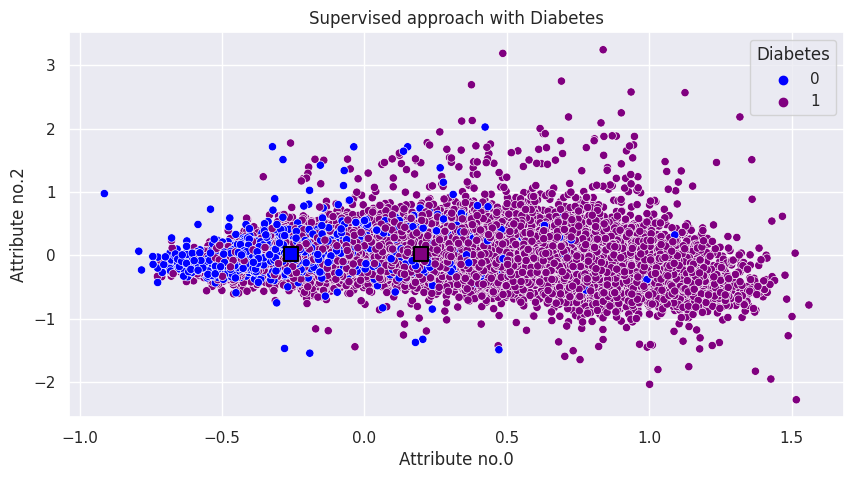

In [ ]:
feat1 = 0 # feature no.
feat2 = 2 # feature no.
fig5 = plt.figure('Scatterplot with clusters form by cutting the dendrogram at %.2f' % K, figsize = (10,5))  # setting the figure size
PAL = ['blue', 'purple', 'red', 'black', 'green', 'orange', 'yellow','lightblue','cyan']#'lightgreen','grey','brown','darkblue'
sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = y, palette = PAL) # plotting the scatterplot
for k in range(K): # plotting the points
   plt.scatter(x=centers[k, feat1], y = centers[k, feat2], s = 100, marker = 's', edgecolor = 'black', linewidth = 1.5, color = PAL[k])
sns.set_theme(style = 'dark') # setting the style
plt.xlabel('Attribute no.%s' % feat1) # setting the x label
plt.ylabel('Attribute no.%s' % feat2) # setting the y label
plt.title("Supervised approach with Diabetes") # setting the title
plt.grid() # adding grid
plt.show() # showing the plot


We need to compute 2 centroids, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  0.12 0.07 0.03 0.0 -0.0
The centroid of cluster 1 has coordinates:  0.5 0.05 -0.1 0.03 -0.01


<ipython-input-25-1e26452ee77c>:19: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = y_stroke, palette = PAL) # plotting the scatterplot


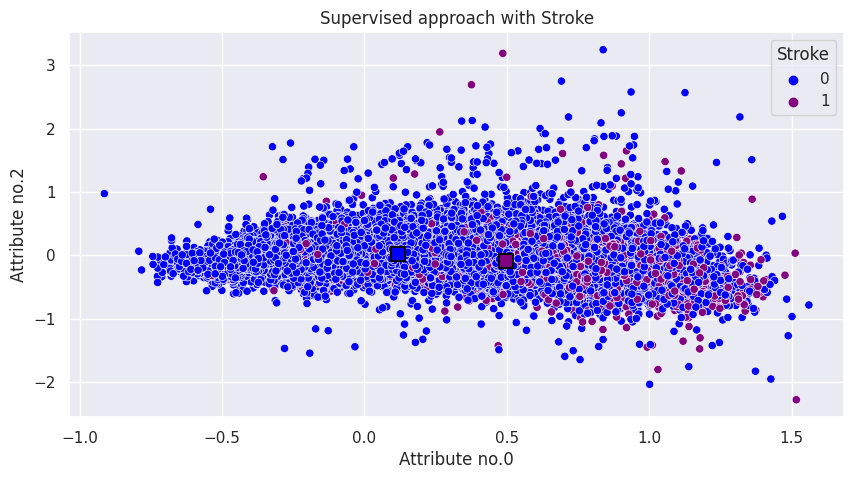

In [ ]:
# Stroke case
K = 2
# Find centers
centers = np.zeros((K, M)) # K is the number of clusters
print("\nWe need to compute %d centroids, as we have %d clusters." % (K, K) )
for k in range(1, K+1):
  ind = np.array(np.where(y_stroke == k-1)[0]) # indices of objects in cluster
  #print(ind.shape)
  #break # only one cluster
  cluster_points = X.iloc[ind,:] # points in cluster
  centers[k-1, :] = np.mean(cluster_points, axis=0) # computing the centroid
  print("The centroid of cluster %d has coordinates: " % (k-1), *centers[k-1,:].round(2))

  # Scatterplot the dataset with this clustering solution
feat1 = 0 # feature no.
feat2 = 2 # feature no.
fig5 = plt.figure('Scatterplot with clusters form by cutting the dendrogram at %.2f' % K, figsize = (10,5))  # setting the figure size
PAL = ['blue', 'purple', 'red', 'black', 'green', 'orange', 'yellow','lightblue','cyan']#'lightgreen','grey','brown','darkblue'
sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = y_stroke, palette = PAL) # plotting the scatterplot
for k in range(K): # plotting the points
   plt.scatter(x=centers[k, feat1], y = centers[k, feat2], s = 100, marker = 's', edgecolor = 'black', linewidth = 1.5, color = PAL[k])
sns.set_theme(style = 'dark') # setting the style
plt.xlabel('Attribute no.%s' % feat1) # setting the x label
plt.ylabel('Attribute no.%s' % feat2) # setting the y label
plt.title("Supervised approach with Stroke") # setting the title
plt.grid() # adding grid
plt.show() # showing the plot


We need to compute 2 centroids, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  -0.05 0.04 0.03 -0.05 -0.02
The centroid of cluster 1 has coordinates:  0.25 0.08 0.01 0.03 0.0


<ipython-input-26-9aa8e8941879>:19: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = y_hyp, palette = PAL) # plotting the scatterplot


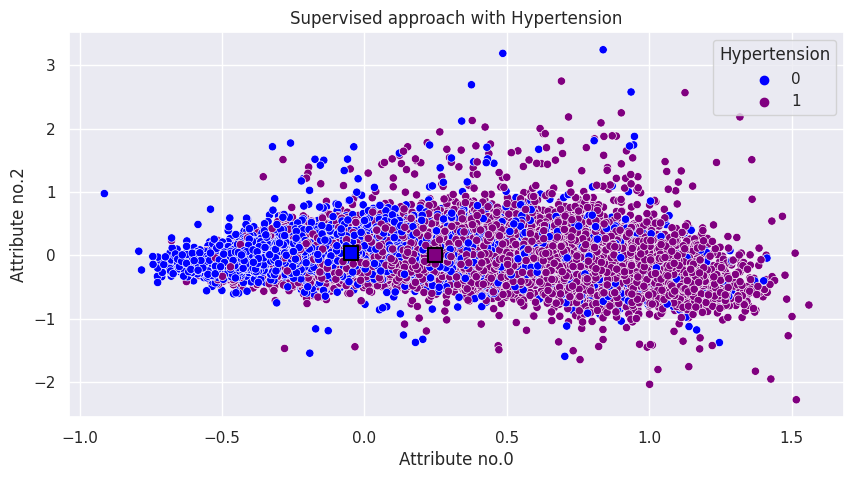

In [ ]:
# Hypertension case
K = 2
# Find centers
centers = np.zeros((K, M)) # K is the number of clusters
print("\nWe need to compute %d centroids, as we have %d clusters." % (K, K) )
for k in range(1, K+1):
  ind = np.array(np.where(y_hyp == k-1)[0]) # indices of objects in cluster
  #print(ind.shape)
  #break # only one cluster
  cluster_points = X.iloc[ind,:] # points in cluster
  centers[k-1, :] = np.mean(cluster_points, axis=0) # computing the centroid
  print("The centroid of cluster %d has coordinates: " % (k-1), *centers[k-1,:].round(2))

  # Scatterplot the dataset with this clustering solution
feat1 = 0 # feature no.
feat2 = 2 # feature no.
fig5 = plt.figure('Scatterplot with clusters form by cutting the dendrogram at %.2f' % K, figsize = (10,5))  # setting the figure size
PAL = ['blue', 'purple', 'red', 'black', 'green', 'orange', 'yellow','lightblue','cyan']#'lightgreen','grey','brown','darkblue'
sns.scatterplot(x = X.iloc[:, feat1], y = X.iloc[:, feat2], hue = y_hyp, palette = PAL) # plotting the scatterplot
for k in range(K): # plotting the points
   plt.scatter(x=centers[k, feat1], y = centers[k, feat2], s = 100, marker = 's', edgecolor = 'black', linewidth = 1.5, color = PAL[k])
sns.set_theme(style = 'dark') # setting the style
plt.xlabel('Attribute no.%s' % feat1) # setting the x label
plt.ylabel('Attribute no.%s' % feat2) # setting the y label
plt.title("Supervised approach with Hypertension") # setting the title
plt.grid() # adding grid
plt.show() # showing the plot